In [49]:
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix 

In [50]:
N = 1000
y = np.array([None]*N)

def llenarY(n,N=100):
    for n in range(N):
      y[n] = math.cos(((2*math.pi*n)/N))+0.1*rnd.random()


def f(x):
    f = 0
    for i in range(N):
        aux = x[i] - y[i]
        f += aux**2
        if i > 0:
            aux = x[i]-x[i-1]
            f += 2.5*aux**2
    return f


# gradiente  ∇f
def grad(x):
    g = np.array([None]*N)
    for i in range(N):
        g[i] = 2.0*(x[i]-y[i])
        if i > 0:
            g[i] += 5*(x[i]-x[i-1])
        if i < N-1:
            g[i] += 5*(x[i]-x[i+1])
    return g


def hessiano(x):
    a = lil_matrix((N, N))
    for c in range(N):
        if (c-1 >= 0):
            a[c, c-1] = -5
        if (1 < c < N-1):
            a[c, c] = 12
        else:
            a[c, c] = 7
        if (c+1 < N):
            a[c, c+1] = -5
    
    return a 

    # return np.array([
    #     [7, -5, 0, 0, 0, 0, 0, 0, 0, 0],
    #     [-5, 12, -5, 0, 0, 0, 0, 0, 0, 0],
    #     [0, -5, 12, -5, 0, 0, 0, 0, 0, 0],
    #     [0, 0, -5, 12, -5, 0, 0, 0, 0, 0],
    #     [0, 0, 0, -5, 12, -5, 0, 0, 0, 0],
    #     [0, 0, 0, 0, -5, 12, -5, 0, 0, 0],
    #     [0, 0, 0, 0, 0, -5, 12, -5, 0, 0],
    #     [0, 0, 0, 0, 0, 0, -5, 12, -5, 0],
    #     [0, 0, 0, 0, 0, 0, 0, -5, 12, -5],
    #     [0, 0, 0, 0, 0, 0, 0, 0, -5, 7]
    # ])


# dirección del gradiente p
def dirgrad(x):
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p


In [51]:
#Calculos de phi
def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return (np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [52]:
#Gradiente Conjugado

def gradienteConjugado(x0, b, k=0, tol=1e-6):
    A= hessiano(x0)
    r = A.dot(x0)-b
    p = r*-1
    print(x0)
    print("k, x0, alpha, beta, Ap")
    rDotr = np.dot(r, r)
    AdotP = A.dot(p)
    while np.linalg.norm(r) >= tol:
        alpha = rDotr / np.dot(AdotP, p)
        x0 = x0 + alpha*p
        r1 = r + alpha * AdotP
        b = (np.dot(r1, r1))/rDotr
        p = -r1 + b*p
        # print(x0, f(x0), alpha, b)
        print(k,x0, alpha, b,AdotP)
        r = r1
        rDotr = np.dot(r, r)
        AdotP = A.dot(p)
        k += 1
    return x0

In [53]:
# Descenso de Gradiente
from timeit import default_timer as timer

def exhaustivoRefinado(p, xini, alpha=0, h=0.1, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo refinado. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    while h > tol:
        while phiAlpha(xini, alpha+h, p) < phiAlpha(xini, alpha, p):
            alpha = alpha + h
            fnow = phiAlpha(xini, alpha, p)
            # print(k, h, fnow)
            k += 1
        alpha = alpha-h
        h = h / 10
    return alpha

def gradDescent(x0, k=0, tol=1e-4):
    print("k, x^(k), p^(k), f(x^(k), θ, t")
    op = dirgrad(x0)
    while np.linalg.norm(grad(x0)) >= tol:
        p = dirgrad(x0)
        alpha = exhaustivoRefinado(p, x0)
        # print(f"a: {alpha}")
        x0 = x0 + alpha*p
        if k >= 1:
            angulo = np.arccos(np.dot(op, p))
            op = p
            print(
                f"{k}, {x0}, {p} , {f(x0)}, {round(np.degrees(angulo),6)}, {timer()} ")
        else:
            print(f"{k}, {x0}, {p} , {f(x0)}, - , {timer()}")

        k = k+1
    return x0




In [54]:
llenarY(n = 1000, N=1000)
b = [2*i for i in y]
x0 = np.array([2*i for i in y])


In [55]:
print("<==Grad Conjugado==>")
limpio = gradienteConjugado(x0, b)


<==Grad Conjugado==>
[ 2.02490101  2.16144911  2.02802617  2.163484    2.16759773  2.08451218
  2.12398896  2.0747322   2.1779226   2.05046467  2.13385729  2.07497439
  2.1042361   2.10161006  2.0976115   2.11244866  2.05016452  2.11047086
  2.09515884  2.11233092  2.07761651  2.05757029  2.1555158   2.01302525
  2.10262554  1.99635617  2.11620618  2.10737854  1.98842471  2.0911963
  2.00916457  2.09758693  2.01276444  2.09251416  2.12896258  1.96411028
  1.98643614  2.03614606  2.11634206  2.0877197   2.06408784  2.03244883
  1.96340106  2.03430407  1.93718919  2.09171212  2.03830287  2.10081736
  1.97679181  1.91505614  2.02334002  1.97505132  1.96334567  1.89988694
  1.90137277  1.89077301  1.97136495  2.05292484  2.04592479  1.96774952
  2.02647831  2.04416952  2.04125876  1.96719484  2.03359302  1.9739981
  1.96717882  1.93059235  1.8354964   1.93465114  2.00505941  1.97354815
  1.91668703  1.80648907  1.90802877  1.92953478  1.87905636  1.82225491
  1.94669658  1.84540175  1.8635

In [56]:
print("<==Descenso de Gradiente==>")
limpioDG = gradDescent(x0)


<==Descenso de Gradiente==>
k, x^(k), p^(k), f(x^(k), θ, t
0, [1.7886114766790455 1.543278297125581 1.9076733511526864 1.666982429731225
 1.7092307612483997 1.8254169233348283 1.6719488434854892
 1.8436650834010153 1.5914657329983108 1.8750799530785638
 1.6329490718714963 1.7872617940701803 1.7057124761963653
 1.7304100281278443 1.744903891413346 1.6726620057462174
 1.7971409938312328 1.6723553740565422 1.7548971246906746
 1.6947781292915485 1.7247605563526303 1.799194882988653
 1.5643879528715265 1.8629287405016037 1.5600390502638346
 1.8439378453130837 1.6303751063402128 1.6394316672419684
 1.8335349131809227 1.560363177786482 1.8054914921460918
 1.5758031672841615 1.8032800166405232 1.6860073349065978
 1.5769586775561022 1.783090572915699 1.6608258769256723
 1.7045148684173888 1.6479683656814523 1.72456619341215 1.6936534664615046
 1.6417035627779568 1.740933928518115 1.5282624356067256
 1.8176501168332522 1.5404288285015244 1.781499157581644
 1.5667616797417054 1.683605585875951 1.

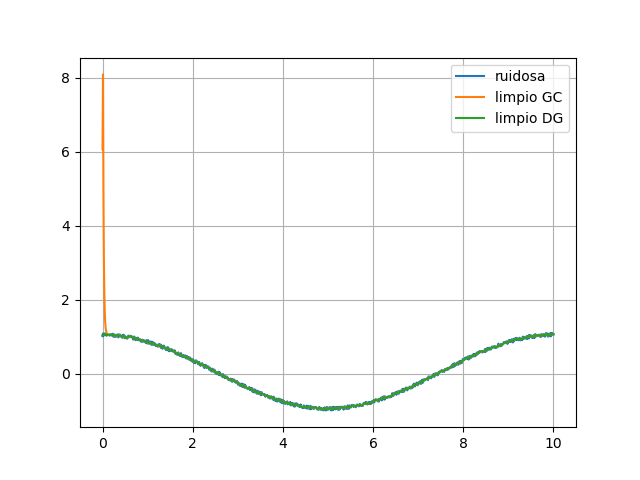

In [58]:
# Graficar

%matplotlib ipympl


x = np.linspace(0,10, 1000)
plt.plot(x, y, label="ruidosa")
plt.plot(x, limpioDG , label="limpio DG")
plt.plot(x, limpio , label="limpio GC")
plt.legend(loc=1)
plt.grid()


In [ ]:
print(limpio)

[ 3.03662596  3.84902391  2.02488926  0.86885353  0.14838569 -0.20648942
 -0.24703802 -0.07109101  0.18186346  0.37266279]
